# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print recipes[0]

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

C:\Program Files\Anaconda2\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [6]:
print texts[0]
print corpus[0]

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [7]:
np.random.seed(76543)
# здесь код для построения модели:
model = models.LdaModel(corpus = corpus, num_topics=40, passes=5)

In [16]:
topics_print = model.show_topics(num_topics=40, num_words=10)             
topics = model.show_topics(num_topics=40, num_words=10, formatted=False)
topics

[(0,
  [('17', 0.082725546797489433),
   ('116', 0.080315765339626519),
   ('100', 0.079497577421526841),
   ('54', 0.063701738565159552),
   ('279', 0.06369883414961848),
   ('119', 0.03542869687610041),
   ('307', 0.034279080876904892),
   ('29', 0.034236340577608285),
   ('38', 0.033008901590063471),
   ('12', 0.031967658022379199)]),
 (1,
  [('195', 0.13016303288245021),
   ('45', 0.077427587673201639),
   ('178', 0.052235425972973544),
   ('124', 0.04311400910741045),
   ('211', 0.039756486834713993),
   ('29', 0.038824867680194643),
   ('958', 0.036512794836589486),
   ('705', 0.031274197021606782),
   ('17', 0.029083608761411691),
   ('1493', 0.02569617095970626)]),
 (2,
  [('770', 0.065976910937656216),
   ('830', 0.046548563175849753),
   ('1338', 0.045595776970031067),
   ('480', 0.044639430969227956),
   ('3', 0.044296605936575036),
   ('1637', 0.039024793030259783),
   ('816', 0.034564495735168045),
   ('806', 0.032915117949667574),
   ('117', 0.029791949970061241),
   ('12

In [15]:
dictionary.token2id["salt"]

17

In [17]:
words = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
counts = []
for word in words:
    token_id = str(dictionary.token2id[word])
    count = 0
    for topic in topics:
        for word_info in topic[1]:
            if word_info[0] == token_id:
                count += 1
    counts.append(count)

In [18]:
counts

[20, 7, 10, 1, 1, 2]

In [19]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [22]:
save_answers1(*counts)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [30]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [28]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [31]:
tokens_bad = []
dict_size_before = len(dictionary2.dfs)
for token in dictionary2.dfs:
    if dictionary2.dfs[token] >4000:
        tokens_bad.append(token)
dictionary2.filter_tokens(tokens_bad)
dict_size_after = len(dictionary2.dfs)

corpus2 = [dictionary2.doc2bow(text) for text in texts] 

corpus_size_before = 0
for doc in corpus:
    corpus_size_before += len(doc)
    
corpus_size_after = 0
for doc in corpus2:
    corpus_size_after += len(doc)
print(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

(6714, 6702, 428249, 343665)


In [32]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [33]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [34]:
np.random.seed(76543)
model2 = models.LdaModel(corpus = corpus2, id2word=dictionary2, num_topics=40, passes=5)

In [35]:
coh = model.top_topics(corpus)
coh

[([(0.060701202478307417, '200'),
   (0.056556523215000848, '20'),
   (0.055464595931986792, '17'),
   (0.05364391417341325, '39'),
   (0.039306025072256667, '45'),
   (0.034363248636521453, '348'),
   (0.031722436012575302, '183'),
   (0.030095138443782556, '236'),
   (0.026637303062034955, '216'),
   (0.026198957615161857, '12'),
   (0.024929711377600312, '38'),
   (0.024071897905204271, '215'),
   (0.021874557131399325, '9'),
   (0.020369964847447675, '209'),
   (0.019996696146977751, '141'),
   (0.019901726746529506, '21'),
   (0.019670505251226419, '0'),
   (0.017446509345271165, '117'),
   (0.016693327304388075, '231'),
   (0.01595851529010368, '4')],
  -437.94129330591329),
 ([(0.065601824097514139, '58'),
   (0.064436314445619522, '17'),
   (0.049230196150176479, '110'),
   (0.040356655479829917, '74'),
   (0.033949493378055487, '4'),
   (0.033907681758099668, '8'),
   (0.033125607095506882, '54'),
   (0.031578514512513596, '839'),
   (0.030626995840766037, '111'),
   (0.028928

In [36]:
#coh = model.top_topics(corpus)
s = 0
for el in coh:
    s += el[1]
coherence = float(s)/len(coh)

In [38]:
coh2 = model2.top_topics(corpus2)
s = 0
for el in coh2:
    s += el[1]
coherence2 = float(s)/len(coh2)

In [39]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [40]:
save_answers3(coherence, coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [42]:
model2.get_document_topics(corpus2[0])

[(5, 0.13074430446058991), (7, 0.50465425903109518), (11, 0.2489764365083138)]

Также выведите содержимое переменной *.alpha* второй модели:

In [43]:
model2.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [44]:
np.random.seed(76543)
model3 = models.LdaModel(corpus = corpus2, id2word=dictionary2, alpha=1, num_topics=40, passes=5)

In [45]:
model3.get_document_topics(corpus2[0])

[(0, 0.021279629403707746),
 (1, 0.021276595744681655),
 (2, 0.021286183136532914),
 (3, 0.022008930955540049),
 (4, 0.021276595744680847),
 (5, 0.021302920821811407),
 (6, 0.021553046238823995),
 (7, 0.024310040780288991),
 (8, 0.021284580554432241),
 (9, 0.021369251252549348),
 (10, 0.021896374463066623),
 (11, 0.021310192350720229),
 (12, 0.021303215826730167),
 (13, 0.021276595744680847),
 (14, 0.021276595744688015),
 (15, 0.027059746670671226),
 (16, 0.021594479354485243),
 (17, 0.042603221939357581),
 (18, 0.021444189436621408),
 (19, 0.076787391410992625),
 (20, 0.021312724535934115),
 (21, 0.021276728469833018),
 (22, 0.02131850825541003),
 (23, 0.02131458138925162),
 (24, 0.021276595744680847),
 (25, 0.044850616032016712),
 (26, 0.021303505038848369),
 (27, 0.021352072074014568),
 (28, 0.043082541051111568),
 (29, 0.034935426987593186),
 (30, 0.021278290340131071),
 (31, 0.021276595744693226),
 (32, 0.022056827066348213),
 (33, 0.02138225116229724),
 (34, 0.021376839368448506)

In [46]:
count_model2 = 0
count_model3 = 0
for doc in corpus2:
    model2_topics = model2.get_document_topics(doc, minimum_probability=0.01)
    model3_topics = model3.get_document_topics(doc, minimum_probability=0.01)
    count_model2 += len(model2_topics)
    count_model3 += len(model3_topics)

In [47]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [48]:
save_answers4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [51]:
X = np.zeros((len(corpus2), 40))

In [52]:
X.shape

(39774L, 40L)

In [50]:
model2.get_document_topics(corpus2[0])

[(5, 0.13075685312853641), (7, 0.50546711861316851), (11, 0.24815102825829385)]

In [53]:
for i, doc in enumerate(corpus2):
    tops = model2.get_document_topics(doc)
    for t in tops:
        X[i, t[0]] = t[1]

In [58]:
y = []
for i, rec in enumerate(recipes):
    y.append(rec['cuisine'])

In [59]:
classes = {}
k = 0
for i in range(len(y)):
    if y[i] in classes:
        y[i] = classes[y[i]]
    else:
        classes[y[i]] = k
        y[i] = k
        k+=1

In [60]:
y

[0,
 1,
 2,
 3,
 3,
 4,
 5,
 6,
 7,
 6,
 6,
 8,
 6,
 7,
 6,
 3,
 9,
 6,
 10,
 11,
 10,
 7,
 1,
 8,
 6,
 8,
 12,
 6,
 8,
 7,
 6,
 12,
 7,
 10,
 6,
 12,
 6,
 2,
 1,
 1,
 6,
 13,
 7,
 3,
 7,
 8,
 14,
 1,
 1,
 1,
 15,
 1,
 6,
 1,
 6,
 4,
 15,
 3,
 6,
 16,
 10,
 10,
 3,
 4,
 6,
 10,
 17,
 14,
 14,
 1,
 5,
 3,
 18,
 6,
 6,
 18,
 18,
 11,
 15,
 7,
 12,
 1,
 14,
 3,
 3,
 6,
 6,
 3,
 17,
 5,
 6,
 1,
 1,
 0,
 7,
 7,
 1,
 3,
 6,
 6,
 6,
 15,
 6,
 0,
 17,
 3,
 7,
 1,
 16,
 17,
 8,
 7,
 1,
 8,
 18,
 16,
 8,
 16,
 7,
 6,
 6,
 6,
 4,
 7,
 15,
 5,
 8,
 7,
 9,
 3,
 10,
 1,
 7,
 5,
 14,
 6,
 3,
 9,
 5,
 6,
 17,
 3,
 7,
 7,
 1,
 14,
 12,
 3,
 8,
 6,
 6,
 6,
 1,
 0,
 15,
 12,
 6,
 17,
 7,
 3,
 6,
 7,
 17,
 8,
 14,
 8,
 5,
 8,
 5,
 15,
 7,
 14,
 15,
 7,
 6,
 2,
 1,
 6,
 6,
 8,
 7,
 3,
 17,
 7,
 7,
 15,
 0,
 7,
 1,
 8,
 9,
 15,
 6,
 7,
 16,
 0,
 12,
 15,
 6,
 1,
 1,
 1,
 6,
 3,
 8,
 15,
 7,
 7,
 14,
 7,
 7,
 16,
 8,
 7,
 0,
 17,
 7,
 5,
 6,
 1,
 6,
 7,
 14,
 7,
 14,
 2,
 7,
 7,
 6,
 7,
 1,
 6,
 15,
 6,
 7,


In [62]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X, y, cv=3)

In [64]:
accuracy = np.mean(scores)

In [65]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [66]:
save_answers5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [67]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

In [68]:
generate_recipe(model2, 10)

whipping cream
freshly ground pepper
whipped cream
whipping cream
malt vinegar
fresh ginger
freshly ground pepper
freshly ground pepper
brandy
sliced green onions


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [69]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [71]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

In [72]:
# Визуализируйте матрицу
tc = compute_topic_cuisine_matrix(model2, corpus2, recipes)

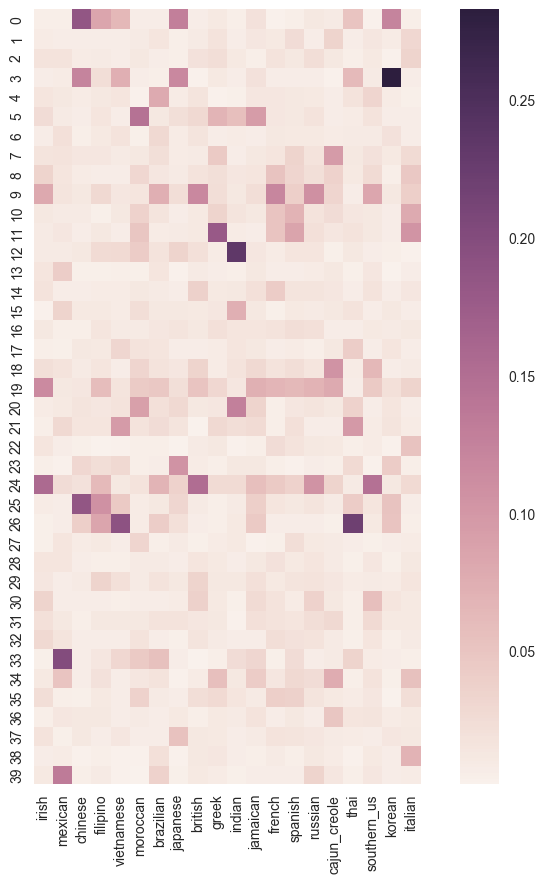

In [74]:
plot_matrix(tc)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 